In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Load Data

In [2]:
df = pd.read_csv("College_admission.csv")
df.head()

,gre,gpa,ses,Gender_Male,Race,rank,admit
0,380,3.61,1,0,3,3,0
1,660,3.67,2,0,2,3,1
2,800,4.00,2,0,2,1,1
3,640,3.19,1,1,2,4,1
4,520,2.93,3,1,2,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gre          400 non-null    int64  
 1   gpa          400 non-null    float64
 2   ses          400 non-null    int64  
 3   Gender_Male  400 non-null    int64  
 4   Race         400 non-null    int64  
 5   rank         400 non-null    int64  
 6   admit        400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [4]:
df.isnull().sum()

gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
admit          0
dtype: int64

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,gre,gpa,ses,Gender_Male,Race,rank,admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,587.70,3.39,1.99,0.47,1.96,2.48,0.32
std,115.52,0.38,0.81,0.50,0.82,0.94,0.47
min,220.00,2.26,1.00,0.00,1.00,1.00,0.00
25%,520.00,3.13,1.00,0.00,1.00,2.00,0.00
50%,580.00,3.40,2.00,0.00,2.00,2.00,0.00
75%,660.00,3.67,3.00,1.00,3.00,3.00,1.00
max,800.00,4.00,3.00,1.00,3.00,4.00,1.00


In [6]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Data Pre-Processing

In [7]:
df.columns

Index(['gre', 'gpa', 'ses', 'Gender_Male', 'Race', 'rank', 'admit'], dtype='object')

How many missing zeros are mising in each feature

In [12]:
# How many missing zeros are mising in each feature
feature_columns = [
    'gre', 'gpa', 'ses', 'Gender_Male',
    'Race', 'rank'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

gre ==> Missing zeros : 0
gpa ==> Missing zeros : 0
ses ==> Missing zeros : 0
Gender_Male ==> Missing zeros : 210
Race ==> Missing zeros : 0
rank ==> Missing zeros : 0


In [13]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

gre ==> Missing zeros : 0
gpa ==> Missing zeros : 0
ses ==> Missing zeros : 0
Gender_Male ==> Missing zeros : 0
Race ==> Missing zeros : 0
rank ==> Missing zeros : 0


In [15]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.admit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Bagged Decision Trees

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[192   0]
 [  0  88]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   1.00  1.00      1.00       1.00          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  1.00      1.00       1.00          1.00
support   192.00 88.00      1.00     280.00        280.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[68 13]
 [25 14]]
ACCURACY SCORE:
0.6833
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.73  0.52      0.68       0.62          0.66
recall     0.84  0.36      0.68       0.60          0.68
f1-score   0.78  0.42      0.68       0.60          0.67
support   81.00 39.00      0.68     120.00        120.00


In [18]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

Random Forest algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[192   0]
 [  0  88]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   1.00  1.00      1.00       1.00          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  1.00      1.00       1.00          1.00
support   192.00 88.00      1.00     280.00        280.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[69 12]
 [28 11]]
ACCURACY SCORE:
0.6667
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.71  0.48      0.67       0.59          0.64
recall     0.85  0.28      0.67       0.57          0.67
f1-score   0.78  0.35      0.67       0.57          0.64
support   81.00 39.00      0.67     120.00        120.00


In [20]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

Extra Trees

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[192   0]
 [  0  88]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   1.00  1.00      1.00       1.00          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  1.00      1.00       1.00          1.00
support   192.00 88.00      1.00     280.00        280.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[64 17]
 [25 14]]
ACCURACY SCORE:
0.6500
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.45      0.65       0.59          0.63
recall     0.79  0.36      0.65       0.57          0.65
f1-score   0.75  0.40      0.65       0.58          0.64
support   81.00 39.00      0.65     120.00        120.00


In [22]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

Boosting Algorithms

AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[174  18]
 [ 56  32]]
ACCURACY SCORE:
0.7357
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.76  0.64      0.74       0.70          0.72
recall      0.91  0.36      0.74       0.63          0.74
f1-score    0.82  0.46      0.74       0.64          0.71
support   192.00 88.00      0.74     280.00        280.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[67 14]
 [28 11]]
ACCURACY SCORE:
0.6500
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.71  0.44      0.65       0.57          0.62
recall     0.83  0.28      0.65       0.55          0.65
f1-score   0.76  0.34      0.65       0.55          0.63
support   81.00 39.00      0.65     120.00        120.00


In [24]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

Stochastic Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[187   5]
 [ 18  70]]
ACCURACY SCORE:
0.9179
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.91  0.93      0.92       0.92          0.92
recall      0.97  0.80      0.92       0.88          0.92
f1-score    0.94  0.86      0.92       0.90          0.92
support   192.00 88.00      0.92     280.00        280.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[72  9]
 [27 12]]
ACCURACY SCORE:
0.7000
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.73  0.57      0.70       0.65          0.68
recall     0.89  0.31      0.70       0.60          0.70
f1-score   0.80  0.40      0.70       0.60          0.67
support   81.00 39.00      0.70     120.00        120.00


In [26]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

Voting Ensemble

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[192   0]
 [ 71  17]]
ACCURACY SCORE:
0.7464
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.73  1.00      0.75       0.87          0.81
recall      1.00  0.19      0.75       0.60          0.75
f1-score    0.84  0.32      0.75       0.58          0.68
support   192.00 88.00      0.75     280.00        280.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[81  0]
 [35  4]]
ACCURACY SCORE:
0.7083
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.70  1.00      0.71       0.85          0.80
recall     1.00  0.10      0.71       0.55          0.71
f1-score   0.82  0.19      0.71       0.50          0.62
support   81.00 39.00      0.71     120.00        120.00


In [28]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

Model Comparison

<Axes: >

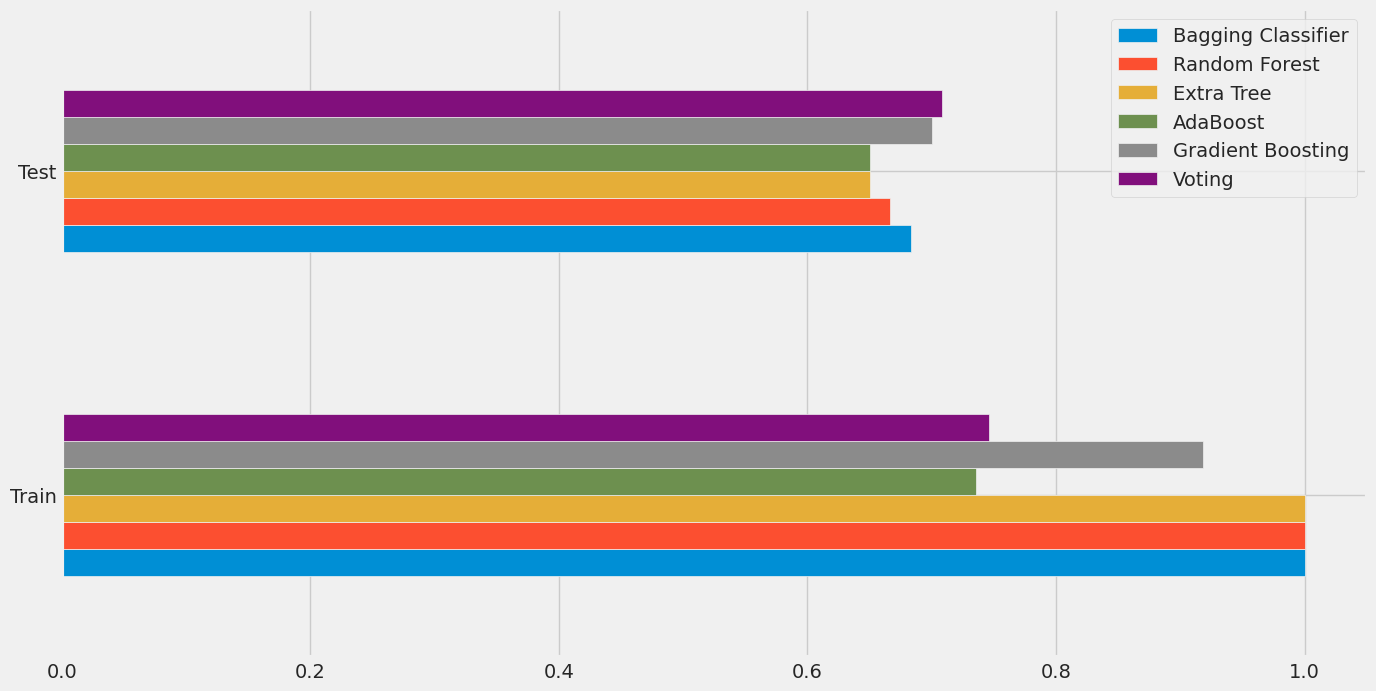

In [29]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))